In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
'''
% The MNIST data is split into three parts: 
%    55,000 data points of training data (mnist.train), 
%    10,000 points of test data (mnist.test), 
%    and 5,000 points of validation data (mnist.validation). 
'''



Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [56]:
import tensorflow as tf

In [57]:
x = tf.placeholder(tf.float32, [None, 784])
'''
x is image, y is label. 
We represent this as a 2-D tensor of floating-point numbers, with a shape [None, 784]. 
(Here None means that a dimension can be of ANY length.)
'''
print(x)
print(type(x))

Tensor("Placeholder_6:0", shape=(?, 784), dtype=float32)
<class 'tensorflow.python.framework.ops.Tensor'>


In [81]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [82]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [83]:
y_ = tf.placeholder(tf.float32, [None, 10])

print(y_)
print(type(y_))

Tensor("Placeholder_8:0", shape=(?, 10), dtype=float32)
<class 'tensorflow.python.framework.ops.Tensor'>


In [85]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
x_7 = [1.,2.,3.]
print(x_7)
print(tf.log(x_7))

[1.0, 2.0, 3.0]
Tensor("Log_11:0", shape=(3,), dtype=float32)


In [86]:
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

In [87]:
sess = tf.InteractiveSession()

In [88]:
tf.global_variables_initializer().run()

In [89]:
for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [90]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))


In [91]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [92]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9008


<class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
<class 'tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet'>


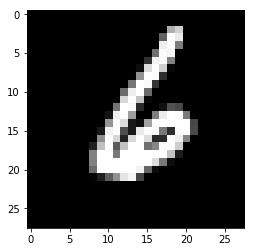

In [107]:
'''
MNIST

'''
print(type(mnist))

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


with tf.Session() as sess:
    #access to an image
    first_image = mnist.train.images[350] * 255

    first_image = np.array(first_image, dtype='uint8')
    pixels = first_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    #Saving plot
    plt.savefig("fig.png")
    
    #print(mnist)
    print(mnist.train)
    print(type(mnist.train))






In [108]:
#%matplotlib inline
import matplotlib
#import matplotlib.pyplot as plt
import numpy as np


# A red/black/blue colormap
cdict = {'red':   [(0.0,  1.0, 1.0),
                    (0.25,  1.0, 1.0),
                    (0.5,  0.0, 0.0),
                    (1.0,  0.0, 0.0)],
        'green': [(0.0,  0.0, 0.0),
                    (1.0,  0.0, 0.0)],
        'blue':  [(0.0,  0.0, 0.0),
                       (0.5,  0.0, 0.0),
                       (0.75, 1.0, 1.0),
                       (1.0,  1.0, 1.0)]}
redblue = matplotlib.colors.LinearSegmentedColormap('red_black_blue',cdict,256)


RuntimeError: Attempted to use a closed Session.